In [1]:
import pandas as pd
df=pd.read_csv(r"loan_data.csv")

In [6]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [19]:
df['emp_length'] = df['emp_length'].str.replace(' years?', '', regex=True)



In [3]:
for i in df:
        if df[i].dtype!=object and df[i].dtype!='string':
                df[i]=df[i].interpolate(method='polynomial',order=5)

In [5]:
df=df.dropna()

In [8]:
month_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}
df['issue_d']=df['issue_d'].replace(month_mapping, regex=True)


In [12]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d' )


In [13]:
#backup
Cleaned_data=df.copy()

In [14]:

Cleaned_data['emp_length']= Cleaned_data['emp_length'].str.replace('+', '', regex=False)
Cleaned_data['emp_length']= Cleaned_data['emp_length'].str.replace('< ', '', regex=False)

In [15]:
Cleaned_data['emp_length'] = Cleaned_data['emp_length'].astype(float)

ValueError: could not convert string to float: '10 years'

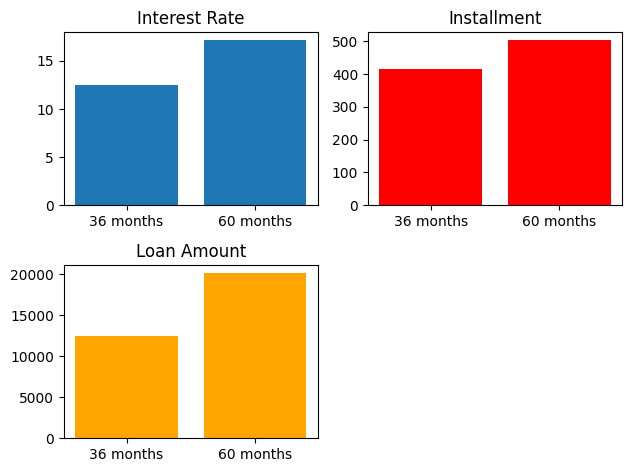

In [28]:
import matplotlib.pyplot as plt
b=df.groupby('term')[['int_rate','installment','loan_amnt']].mean()
y=b['int_rate']
x=['36 months','60 months']
plt.subplot(2,2,1)
plt.bar(x,y)
plt.title('Interest Rate')

y=b['installment']
plt.subplot(2,2,2)
plt.bar(x,y,color="red")
plt.title('Installment')

y=b['loan_amnt']
plt.subplot(2,2,3)
plt.bar(x,y,color="orange")
plt.title('Loan Amount')
plt.tight_layout(pad=1.0)
plt.show()




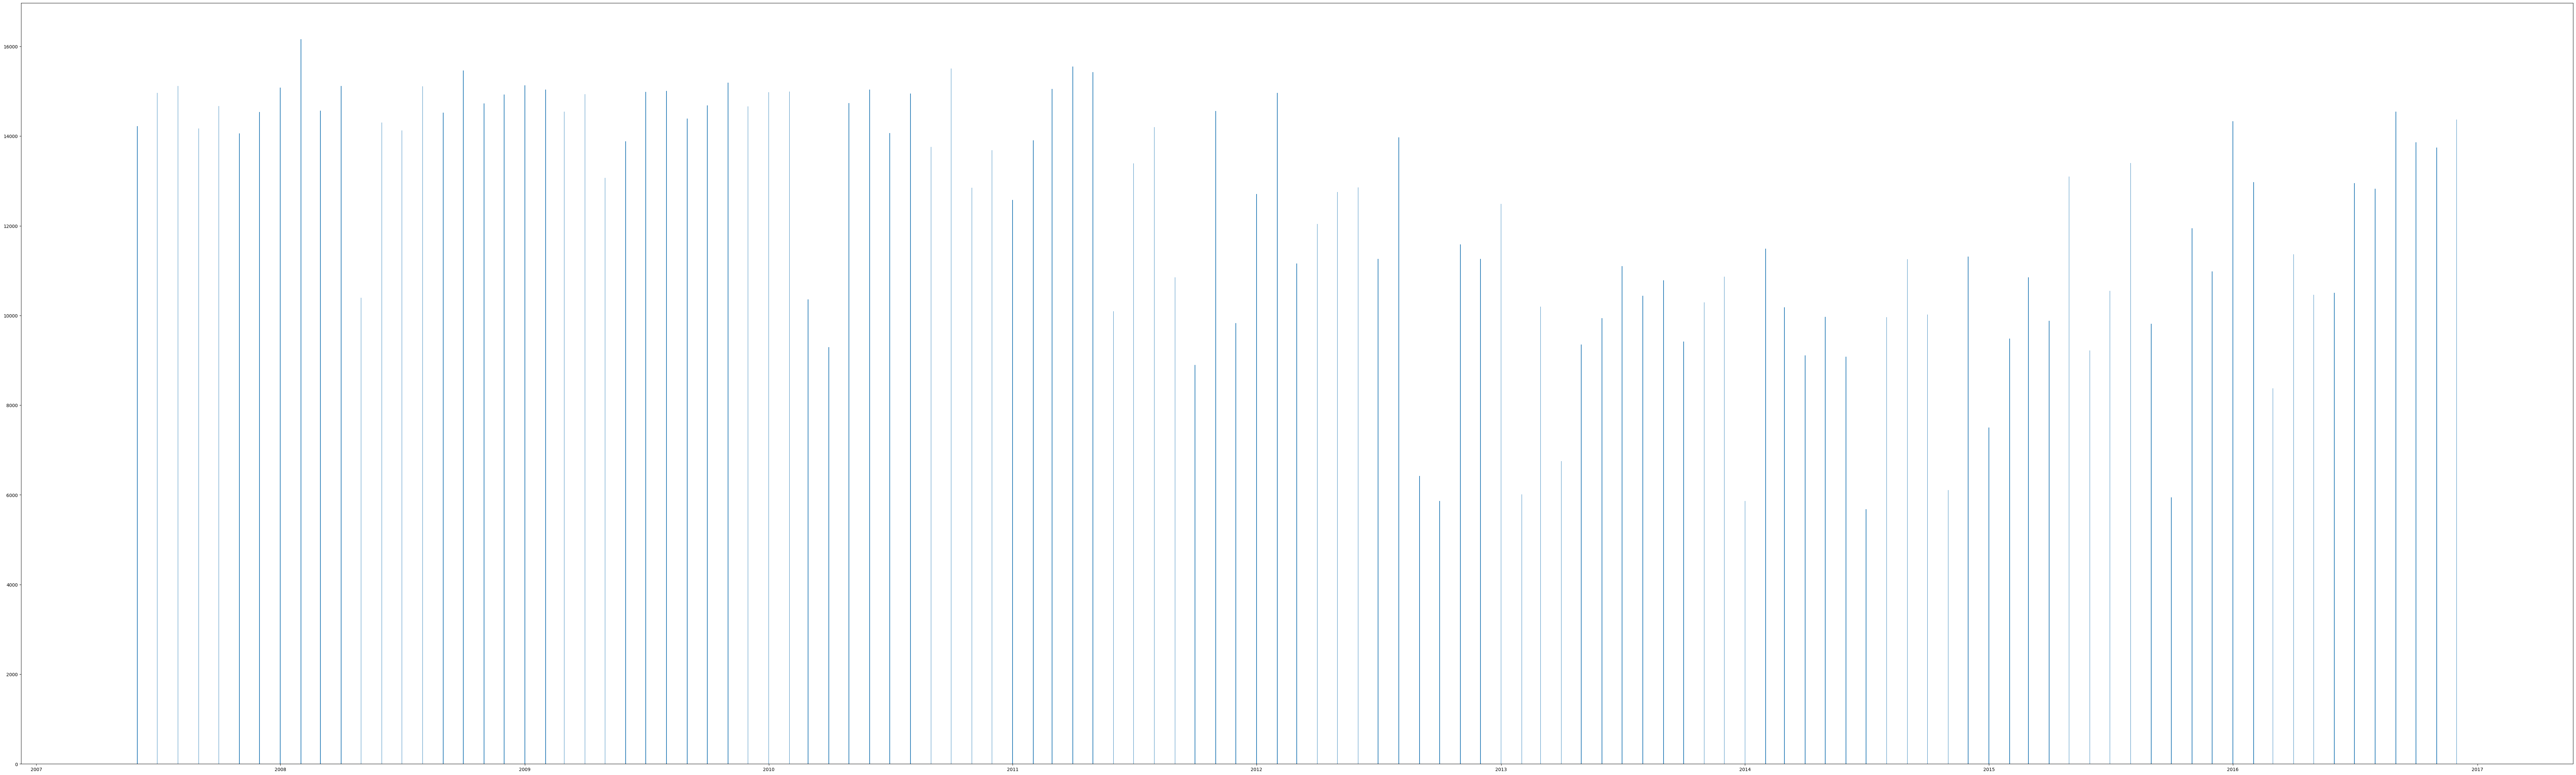

In [29]:
b=df.groupby('issue_d')[['installment','loan_amnt']].mean()
y=df['issue_d'].unique()
x=b['loan_amnt']
plt.figure(figsize=(100,30))
plt.bar(y,x)
plt.show()

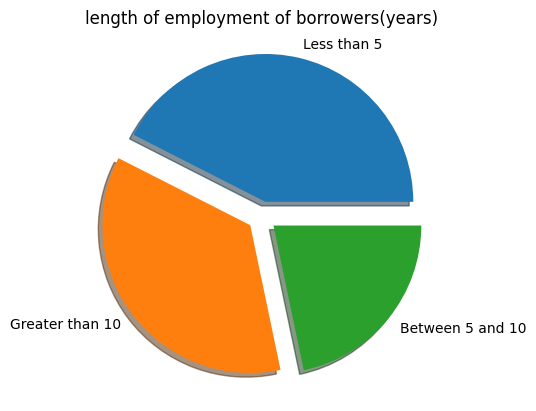

In [30]:
#make this pie
G10=df[df['emp_length']=='10+'].value_counts().sum()
B10n5=Cleaned_data[Cleaned_data['emp_length']>5 ]
B10n5=B10n5[B10n5['emp_length']<10].value_counts().sum()
L5=Cleaned_data[Cleaned_data['emp_length']<5 ].value_counts().sum()
y=[L5,G10,B10n5]
x=['Less than 5','Greater than 10','Between 5 and 10']
M=[0.1,0.1,0.1]
plt.pie(y, labels=x,explode=M,shadow=True)

plt.title('length of employment of borrowers(years)')
plt.show()

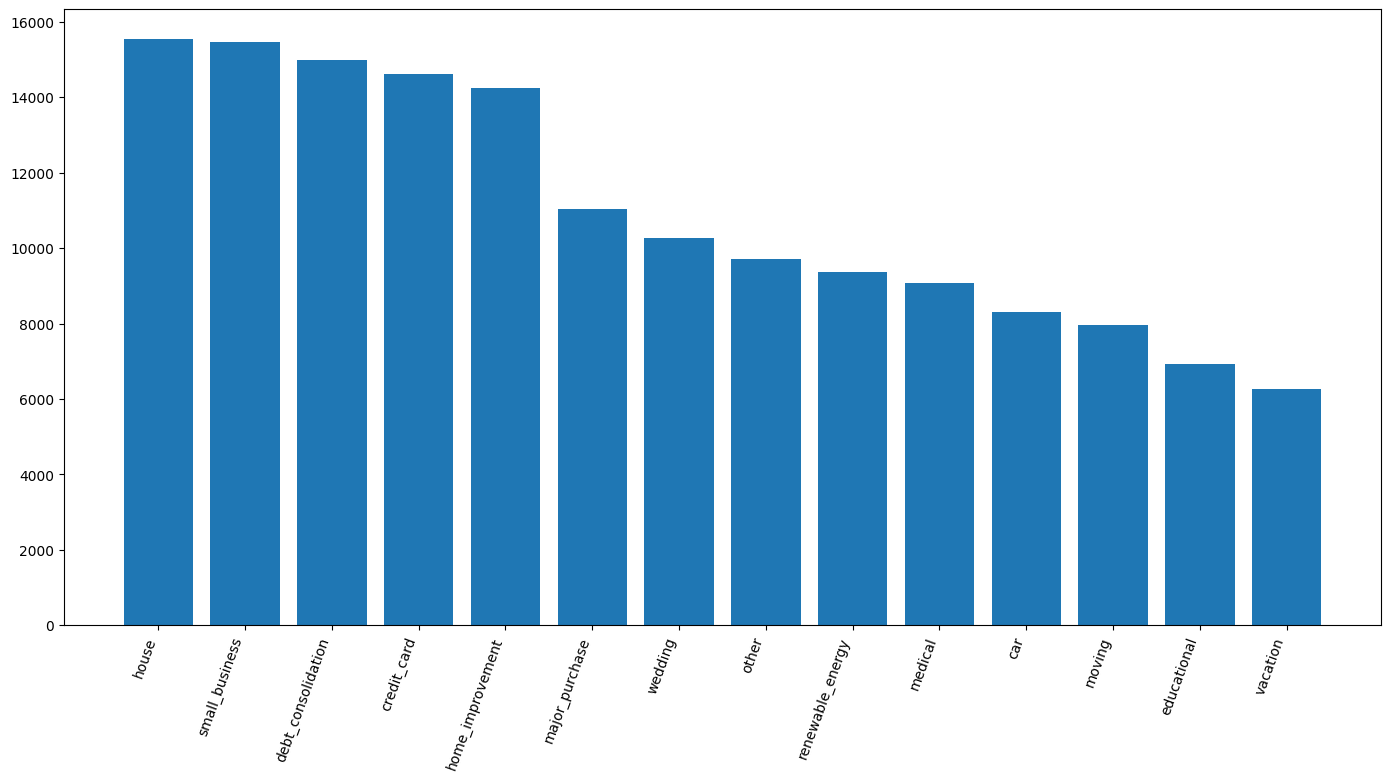

In [31]:
y=df.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False)
x=['house','small_business','debt_consolidation','credit_card','home_improvement','major_purchase','wedding','other','renewable_energy','medical','car','moving','educational','vacation']
plt.figure(figsize=(17,8))
plt.xticks(rotation=70, ha='right')
plt.bar(x,y)
plt.show()

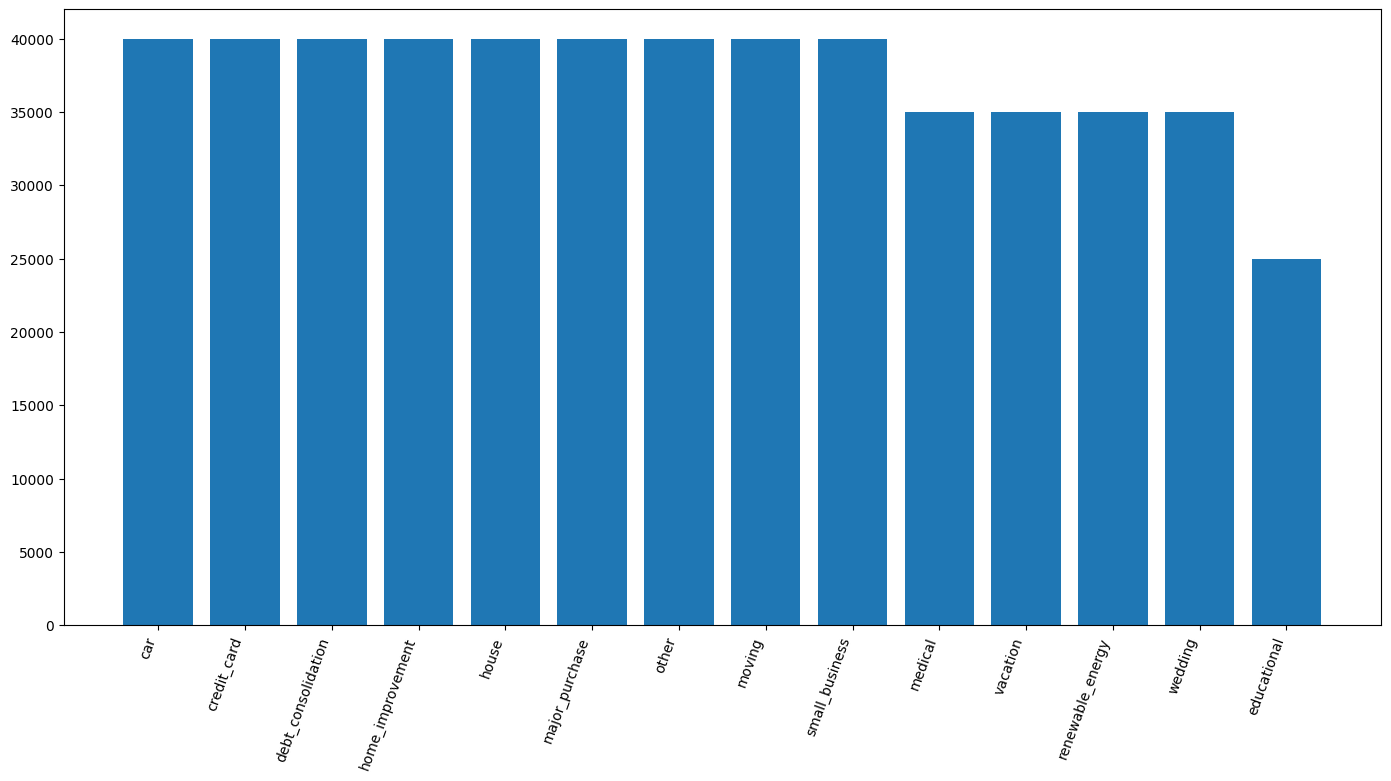

In [32]:
y=df.groupby('purpose')['loan_amnt'].max().sort_values(ascending=False)
x=['car','credit_card','debt_consolidation','home_improvement','house','major_purchase','other','moving','small_business','medical','vacation','renewable_energy','wedding','educational']
plt.figure(figsize=(17,8))
plt.xticks(rotation=70, ha='right')
plt.bar(x,y)
plt.show()

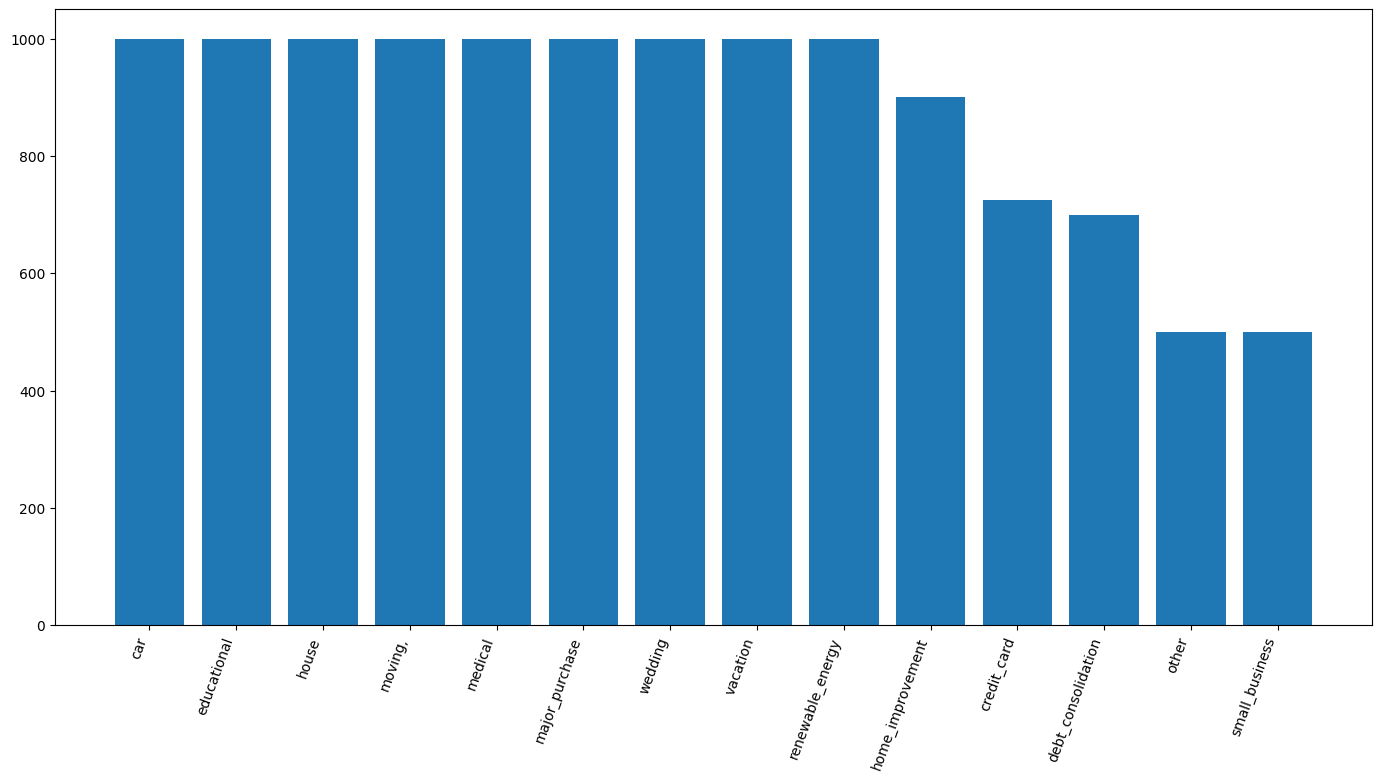

In [33]:
y=df.groupby('purpose')['loan_amnt'].min().sort_values(ascending=False)
x=['car','educational','house','moving,','medical','major_purchase','wedding','vacation','renewable_energy','home_improvement','credit_card','debt_consolidation','other','small_business']
plt.figure(figsize=(17,8))
plt.xticks(rotation=70, ha='right')
plt.bar(x,y)
plt.show()

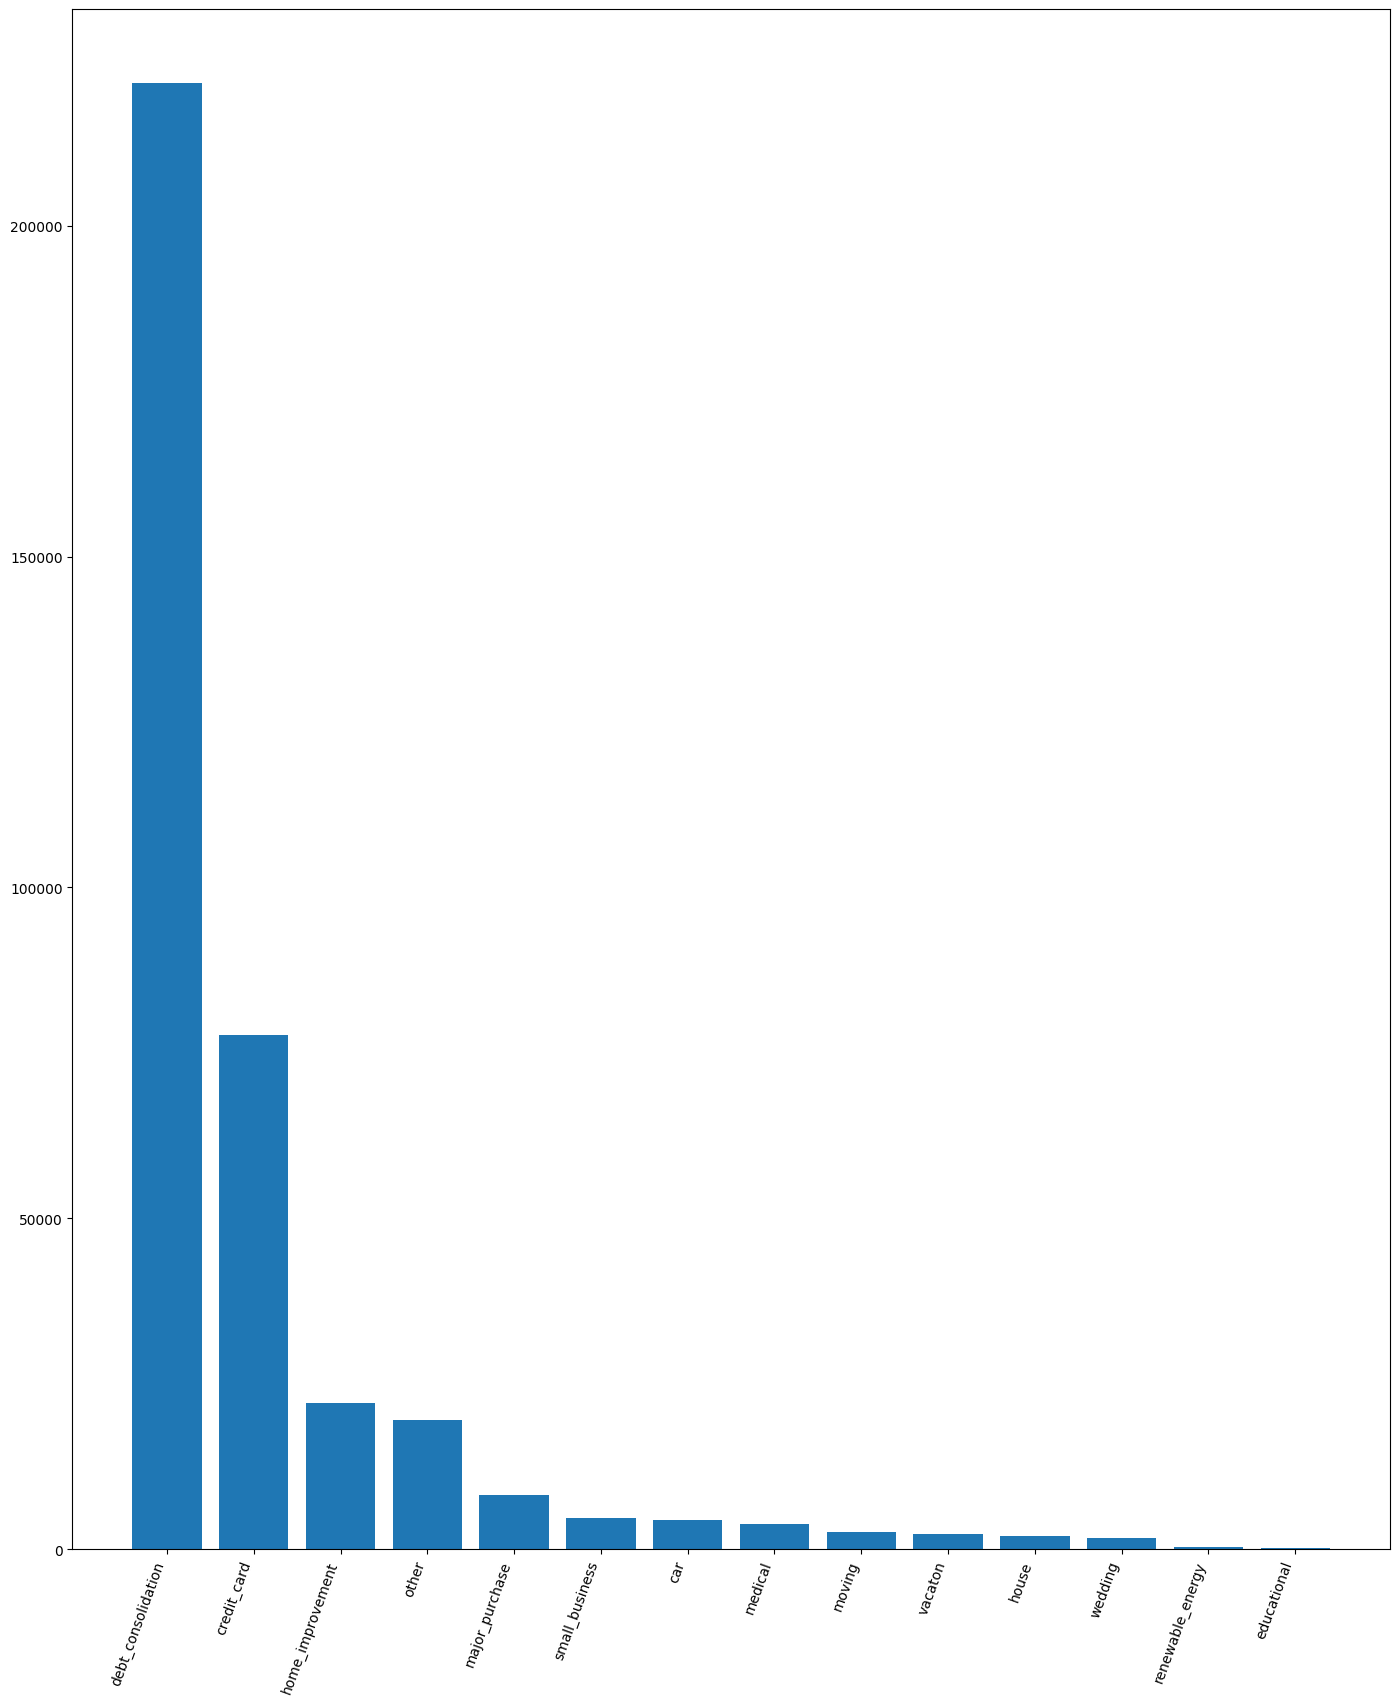

In [34]:
y=df.groupby('purpose')['loan_amnt'].count().sort_values(ascending=False)
x=['debt_consolidation','credit_card','home_improvement','other','major_purchase','small_business','car','medical','moving','vacaton','house','wedding','renewable_energy','educational'  ]
plt.figure(figsize=(17,20))
plt.xticks(rotation=70, ha='right')
plt.bar(x,y)
plt.show()

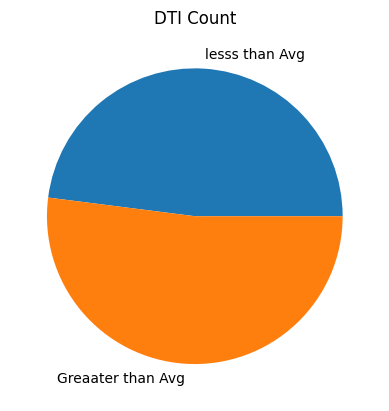

In [35]:
#count of people having dti greater than and less than mean dti
x=[df[df['dti']>df['dti'].mean()].value_counts().sum(),df[df['dti']<df['dti'].mean()].value_counts().sum()]
y=['lesss than Avg','Greaater than Avg']
plt.pie(x,labels=y)
plt.title('DTI Count')
plt.show()

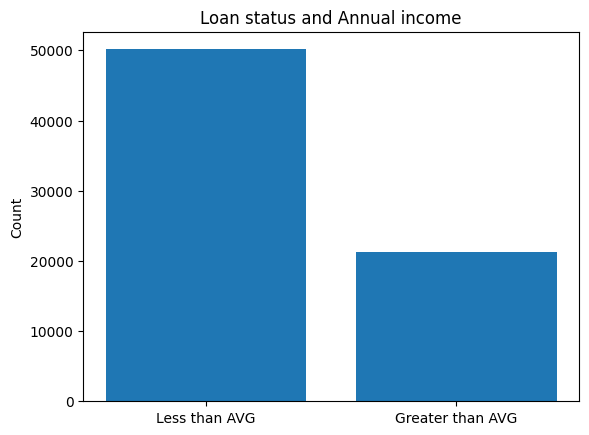

In [36]:
#count of people who are charged off(Loan Status) and having average Annual Income greater than and less than mean dti
b=df[df['loan_status']=='Charged Off']
x=[b[b['annual_inc']<df['annual_inc'].mean()].value_counts().sum(),b[b['annual_inc']>df['annual_inc'].mean()].value_counts().sum()]
y=['Less than AVG','Greater than AVG']
plt.bar(y,x)
plt.ylabel("Count")
plt.title('Loan status and Annual income')
plt.show()

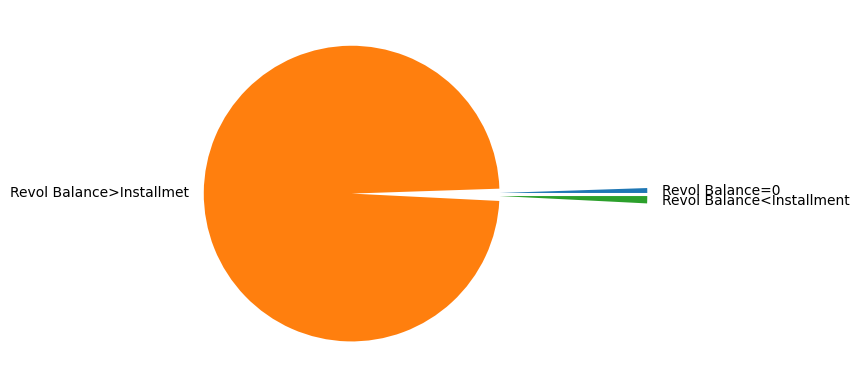

In [37]:
a=df[df['revol_bal']==0].value_counts().sum()
b=df[df['revol_bal']>df['installment']].value_counts().sum()
c=df[df['revol_bal']<df['installment']]
c=c[c['revol_bal']!=0].value_counts().sum()
M=[0.5,0.5,0.5]
y=[a,b,c]
x=['Revol Balance=0', 'Revol Balance>Installmet','Revol Balance<Installment']
plt.pie(y,labels=x,explode=M)
plt.show()


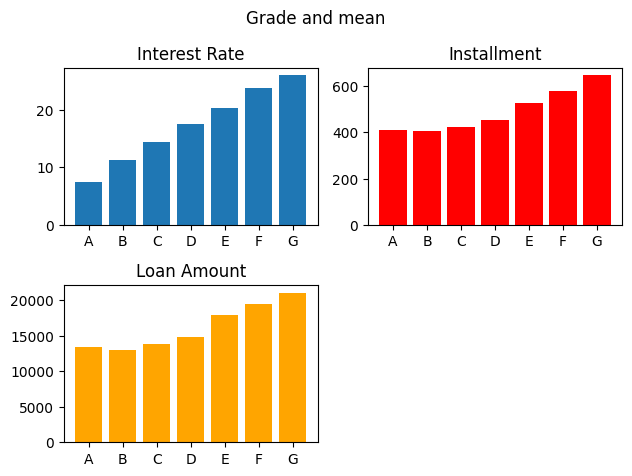

In [38]:
b=df.groupby('grade')[['loan_amnt','int_rate','installment']].mean().sort_values(by='grade')
y=b['int_rate']
x=['A','B','C','D','E','F','G']
plt.subplot(2,2,1)
plt.bar(x,y)
plt.title('Interest Rate')

y=b['installment']
plt.subplot(2,2,2)
plt.bar(x,y,color="red")
plt.title('Installment')

y=b['loan_amnt']
plt.subplot(2,2,3)
plt.bar(x,y,color="orange")
plt.title('Loan Amount')
plt.suptitle('Grade and mean')
plt.tight_layout(pad=1.0)
plt.show()

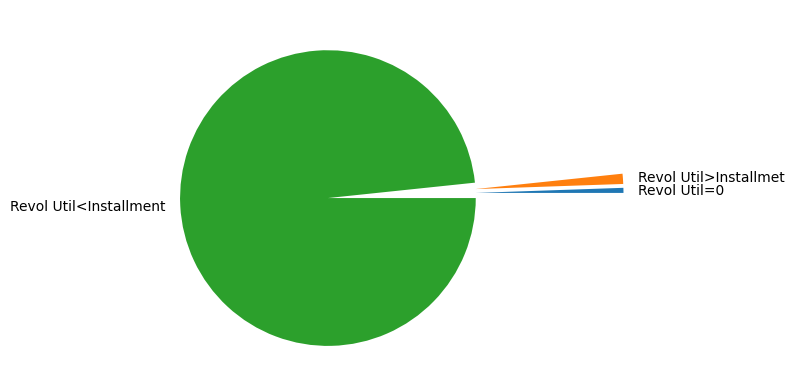

In [39]:
a=df[df['revol_util']==0].value_counts().sum()
b=df[df['revol_util']>df['installment']].value_counts().sum()
c=df[df['revol_util']<df['installment']]
c=c[c['revol_util']!=0].value_counts().sum()
M=[0.5,0.5,0.5]
y=[a,b,c]
x=['Revol Util=0', 'Revol Util>Installmet','Revol Util<Installment']
plt.pie(y,labels=x,explode=M)
plt.show()

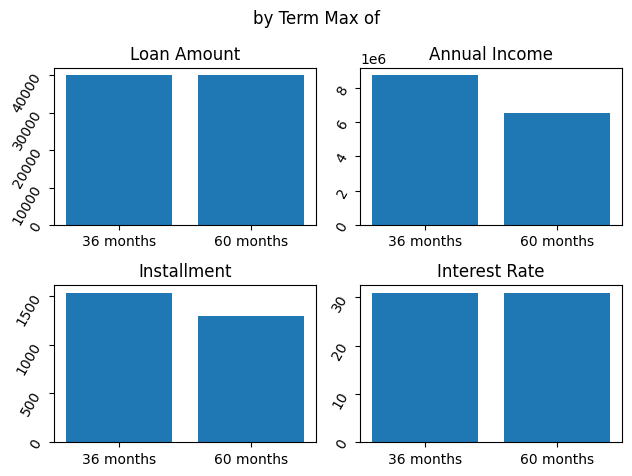

In [ ]:

b=df.groupby('term')[['loan_amnt','annual_inc','installment','int_rate']].max()
y=b['loan_amnt']
x=['36 months','60 months']
plt.subplot(2,2,1)
plt.title('Loan Amount')
plt.yticks(rotation=60)
plt.bar(x,y)

y=b['annual_inc']
plt.subplot(2,2,2)
plt.bar(x,y)
plt.title('Annual Income')
plt.yticks(rotation=60)

y=b['installment']
plt.subplot(2,2,3)
plt.bar(x,y)
plt.title('Installment')
plt.yticks(rotation=60)

y=b['int_rate']
plt.subplot(2,2,4)
plt.bar(x,y)
plt.title('Interest Rate')
plt.yticks(rotation=60)
plt.suptitle('by Term Max of')
plt.tight_layout(pad=1.0)
plt.show()




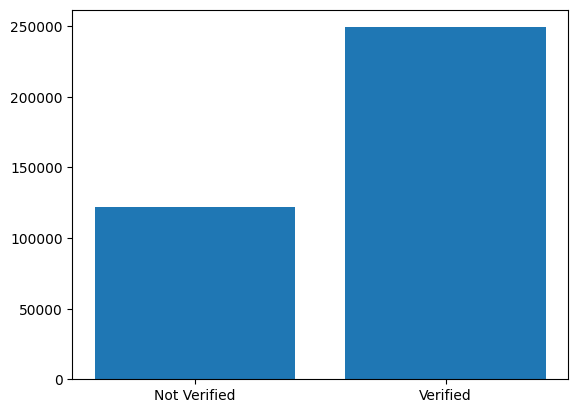

In [41]:
b=df[df['verification_status']=='Not Verified']
a=df[df['verification_status']!='Not Verified']
y=[b['verification_status'].count(),
a['verification_status'].count()]
x=['Not Verified','Verified']
plt.bar(x,y)
plt.show()

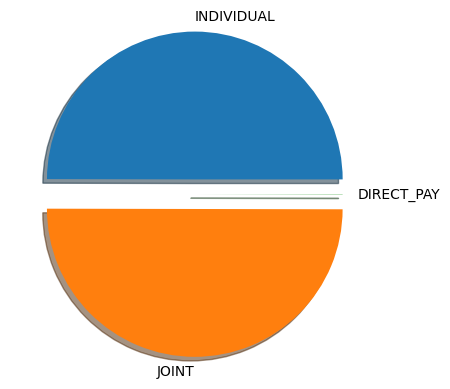

In [42]:
b=df[df['application_type']=='INDIVIDUAL']
a=df[df['application_type']!='JOINT']
c=df[df['application_type']=='DIRECT_PAY']
M=[0.1,0.1,0.0]
y=[b['application_type'].count(),
a['application_type'].count(),c['application_type'].count()]
x=['INDIVIDUAL', 'JOINT', 'DIRECT_PAY']
plt.pie(y, labels=x,explode=M,shadow=True)
plt.show()
